In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df = pd.read_csv('C:/Users/LUCAS/electrical_fault/data/raw/classData.csv')

print(df.shape)
df.head()

(7861, 10)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [71]:
df['faultCode'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')
df['faultName'] = df['faultCode'].map({'1001': 'LG', '1011': 'LLG', '0110': 'LL', '0111': 'LLL', '1111': 'LLLG', '0000': 'NoFault'})

In [72]:
df.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [73]:
df['faultCode'].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

In [74]:
def plotIxV(code):
    mask = df['faultCode'] == code
    
    sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
    fig, ax = plt.subplots(1, 3, figsize=(22, 7))
    sns.scatterplot(data=df[mask], x='Ia', y='Va', ax=ax[0], color='r')
    sns.scatterplot(data=df[mask], x='Ib', y='Vb', ax=ax[1], color='r')
    sns.scatterplot(data=df[mask], x='Ic', y='Vc', ax=ax[2], color='r')
    
    plt.setp(ax, xlim=(-920, 920), ylim=(-0.67, 0.67))
    
    ax[0].set_title(f"Nome do erro:  {df[mask]['faultName'].unique()[0]}\n", {'fontsize': 18})
    ax[0].set_xlabel('Ia' ,fontsize=14)
    ax[0].set_ylabel('Va', fontsize=14)
    ax[0].spines.right.set_visible(False)
    ax[0].spines.top.set_visible(False)
    
    ax[1].set_xlabel('Ib', fontsize=14)
    ax[1].set_ylabel('Vb', fontsize=14)
    ax[1].spines.right.set_visible(False)
    ax[1].spines.top.set_visible(False)
    
    ax[2].set_xlabel('Ic', fontsize=14)
    ax[2].set_ylabel('Vc', fontsize=14)
    ax[2].spines.right.set_visible(False)
    ax[2].spines.top.set_visible(False)
    
    plt.tight_layout()
    plt.show()

Gráficos de Tensão x Corrente

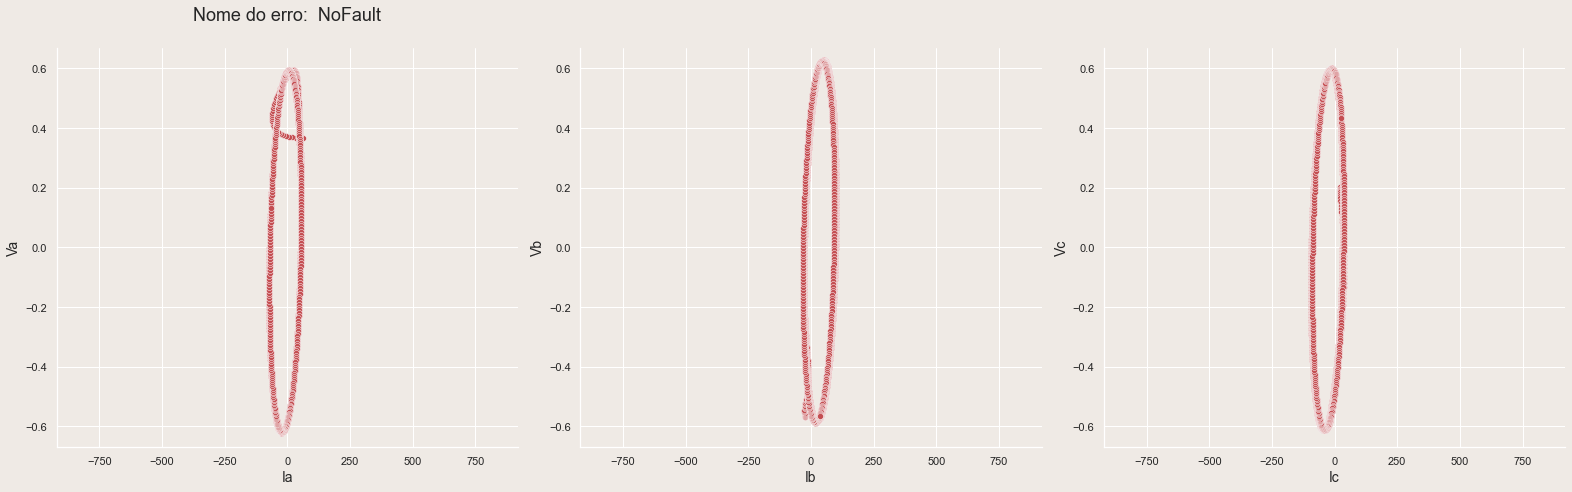

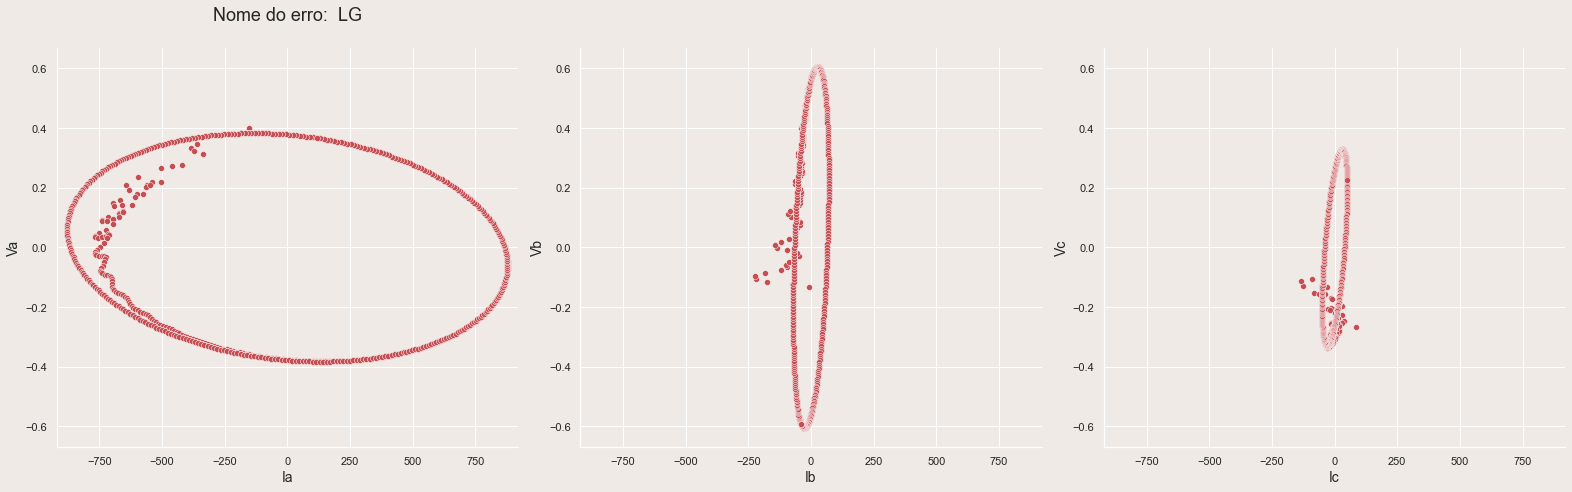

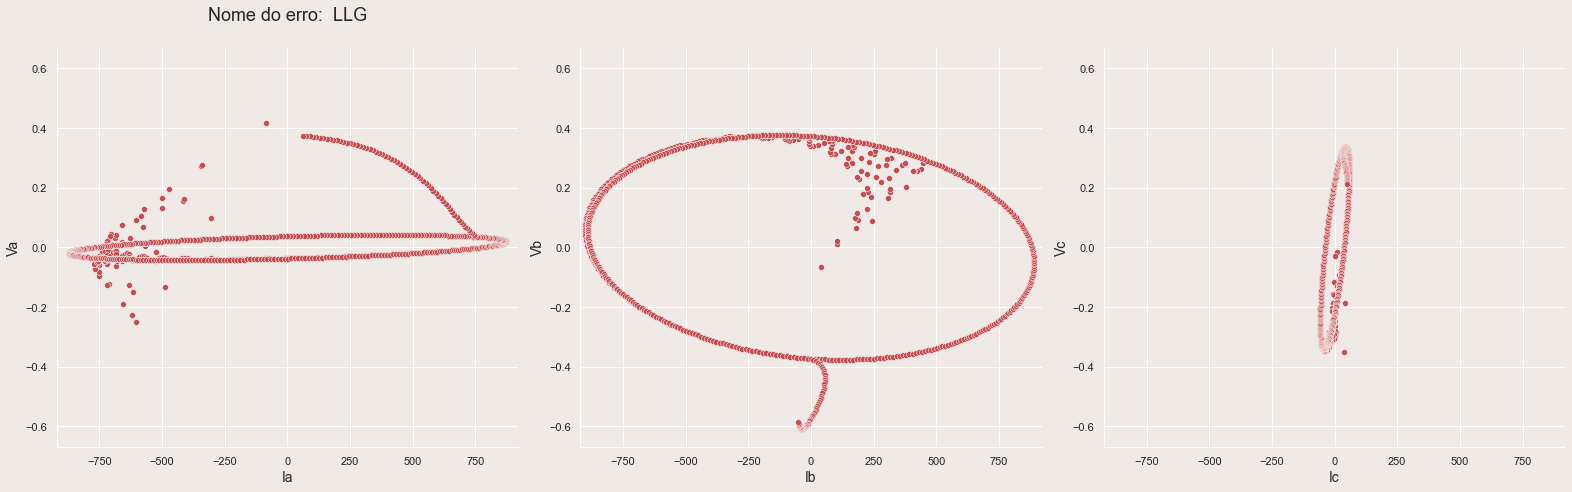

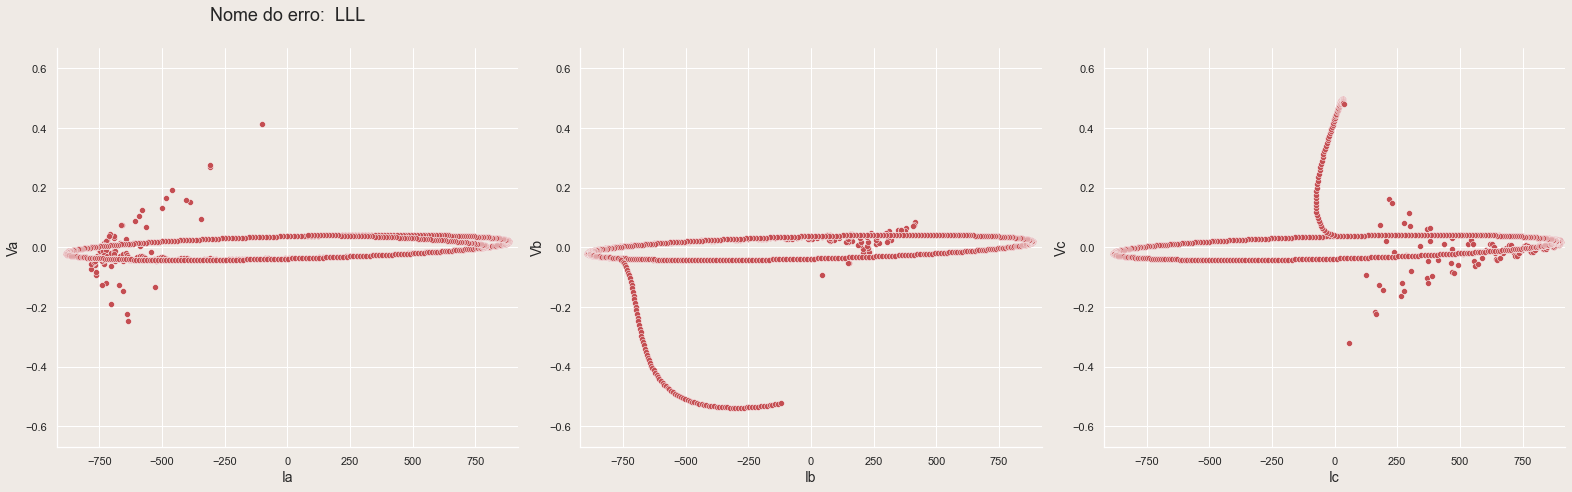

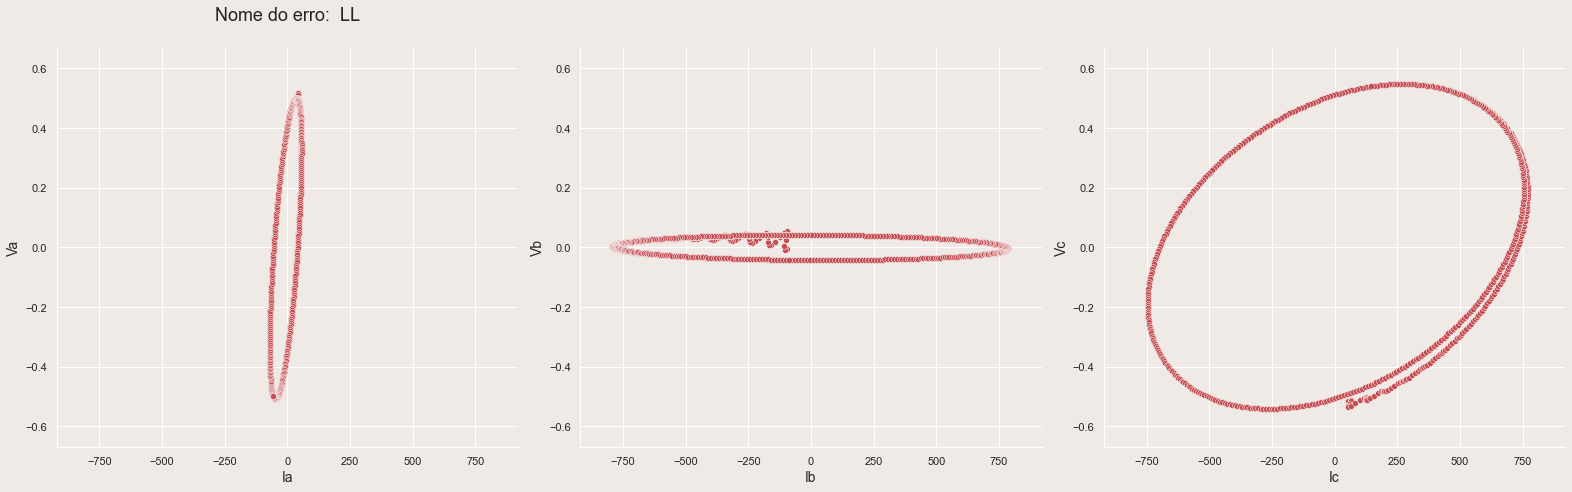

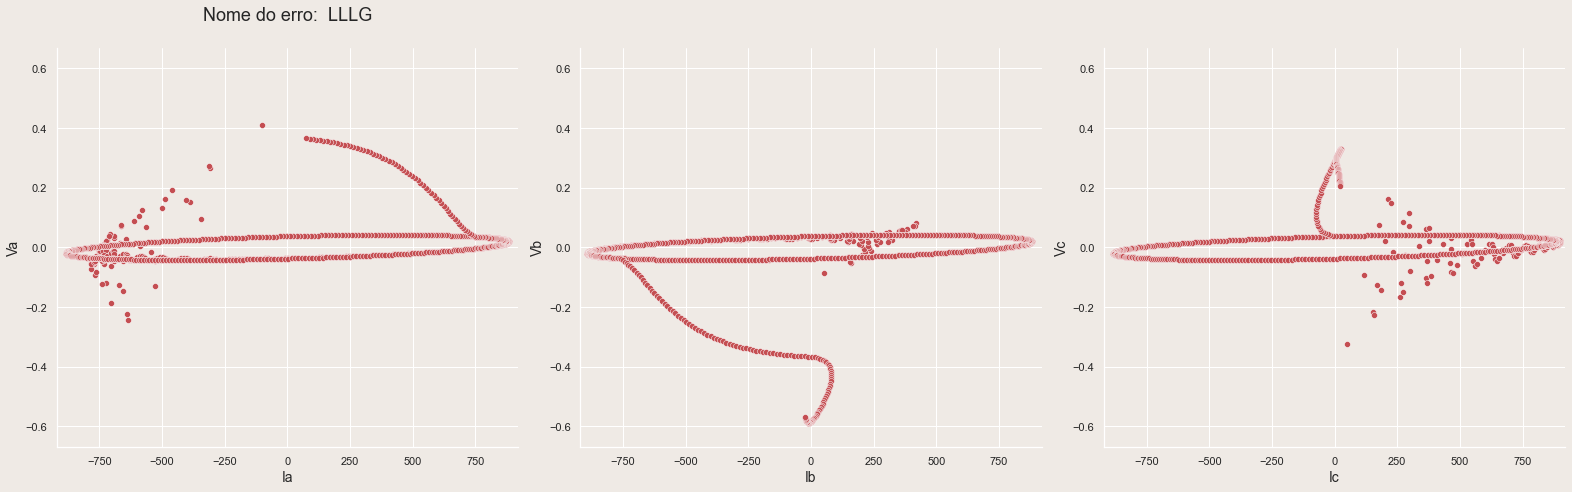

In [75]:
dic = {'Ia': 'Va', 'Ib': 'Vb', 'Ic': 'Vc'}
faultCode = ['0000', '1001', '1011', '0111', '0110', '1111']
for fault in faultCode:
    plotIxV(fault)
        

In [77]:
nf = df[df['faultCode']=='0000'].reset_index(drop=True)
lg = df[df['faultCode']=='1001'].reset_index(drop=True)
ll = df[df['faultCode']=='0110'].reset_index(drop=True)
llg = df[df['faultCode']=='1011'].reset_index(drop=True)
lll = df[df['faultCode']=='0111'].reset_index(drop=True)
lllg = df[df['faultCode']=='1111'].reset_index(drop=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


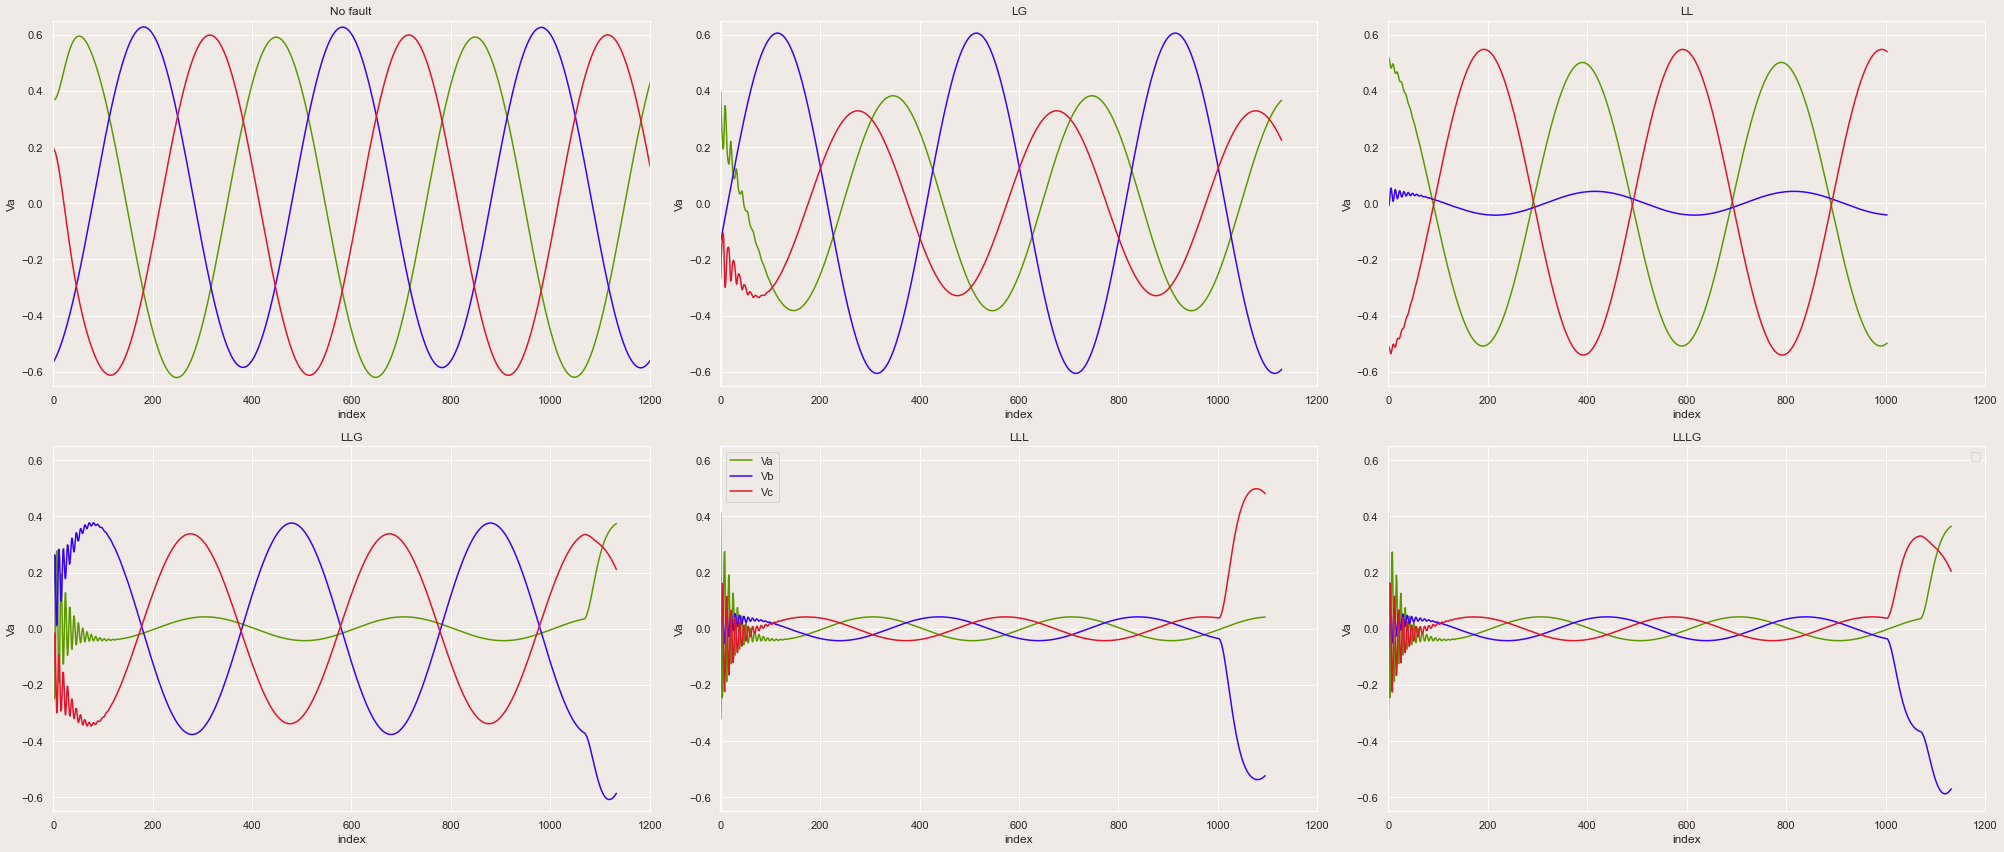

In [78]:
sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
fig, ax = plt.subplots(2, 3, figsize=(28, 12))

sns.lineplot(data=nf.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][0])
ax[0][0].set_title(f'No fault')

sns.lineplot(data=lg.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][1])
ax[0][1].set_title(f'LG')

sns.lineplot(data=ll.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][2])
ax[0][2].set_title(f'LL')

sns.lineplot(data=llg.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[1][0])
sns.lineplot(data=llg.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[1][0])
sns.lineplot(data=llg.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[1][0])
ax[1][0].set_title(f'LLG')

sns.lineplot(data=lll.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[1][1], label='Va')
sns.lineplot(data=lll.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[1][1], label='Vb')
sns.lineplot(data=lll.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[1][1], label='Vc')
ax[1][1].set_title(f'LLL')

sns.lineplot(data=lllg.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[1][2])
sns.lineplot(data=lllg.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[1][2])
sns.lineplot(data=lllg.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[1][2])
ax[1][2].set_title(f'LLLG')

plt.legend()
plt.xlim(-1, 1300)
plt.setp(ax, xlim=(-1, 1200), ylim=(-0.65, 0.65))
plt.tight_layout()

Os gráficos de LLL e LLLG são muito semelhantes, quando desconsiderados os transientes. Vamos ver como se saem em outros gráficos

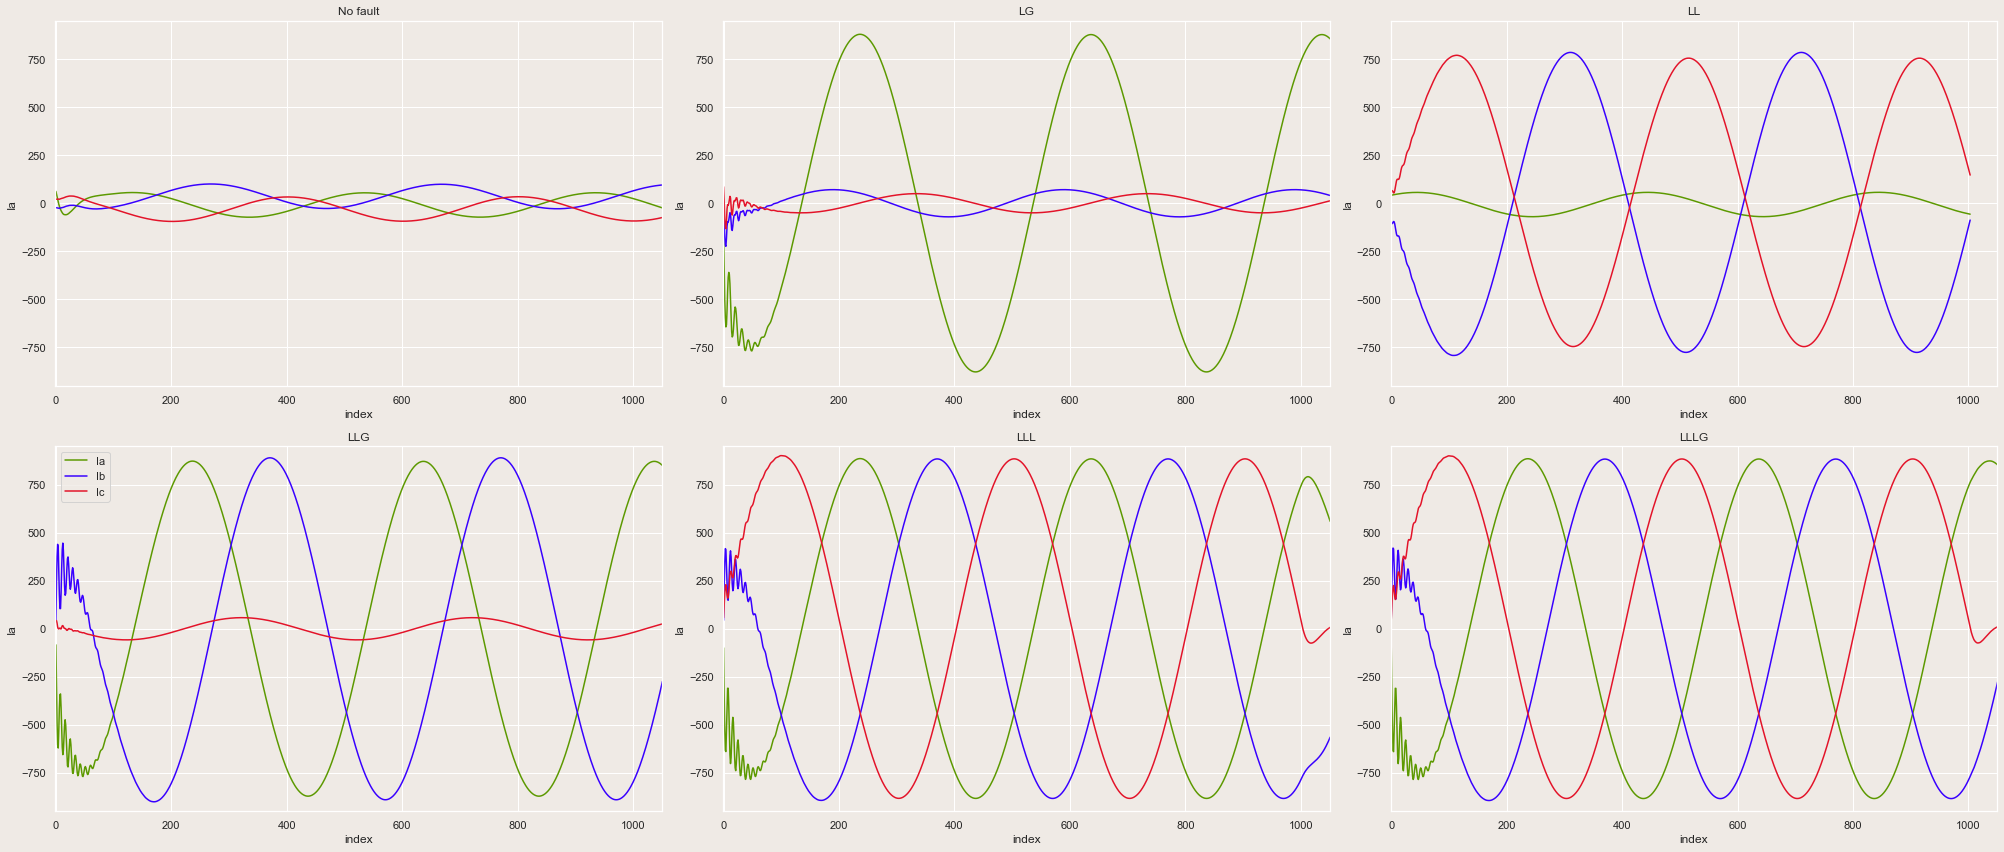

In [79]:
sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
fig, ax = plt.subplots(2, 3, figsize=(28, 12))

sns.lineplot(data=nf.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][0])
ax[0][0].set_title(f'No fault')

sns.lineplot(data=lg.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][1])
ax[0][1].set_title(f'LG')

sns.lineplot(data=ll.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][2])
ax[0][2].set_title(f'LL')

sns.lineplot(data=llg.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[1][0], label='Ia')
sns.lineplot(data=llg.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[1][0], label='Ib')
sns.lineplot(data=llg.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[1][0], label='Ic')
ax[1][0].set_title(f'LLG')

sns.lineplot(data=lll.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[1][1])
sns.lineplot(data=lll.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[1][1])
sns.lineplot(data=lll.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[1][1])
ax[1][1].set_title(f'LLL')

sns.lineplot(data=lllg.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[1][2])
sns.lineplot(data=lllg.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[1][2])
sns.lineplot(data=lllg.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[1][2])
ax[1][2].set_title(f'LLLG')

plt.setp(ax, xlim=(-1, 1050), ylim=(-950, 950))
plt.tight_layout()

Os gráficos de LLL e LLLG se assemelham muito de novo.